In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_excel("Task_Fatigue_1000.xlsx")

In [3]:
df.head()

,Task Name,Attempt Number,Performance,Energy Level
0,History,1,0.63,1.00
1,History,2,0.79,0.90
2,History,3,0.60,0.81
3,History,4,0.55,0.73
4,History,5,0.48,0.66


In [4]:
df['motion_sensor'] = (df['Performance'] > 0.6).astype(int)
df['temp_sensor'] = (df['Energy Level'] > 0.75).astype(int)

In [5]:
df['neuron_fire'] = ((df['motion_sensor'] == 1) & (df['temp_sensor'] == 1)).astype(int)

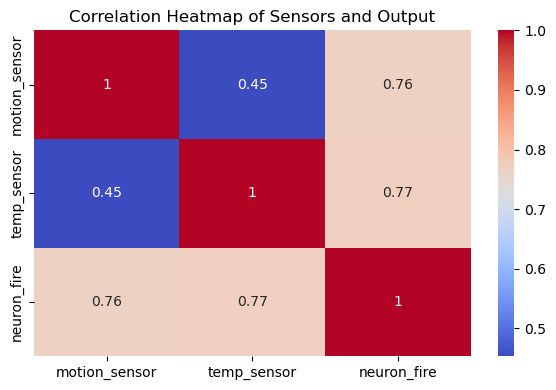

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['motion_sensor', 'temp_sensor', 'neuron_fire']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Sensors and Output")
plt.tight_layout()
plt.show()

C:\Users\mmoha\AppData\Local\Temp\ipykernel_8284\3981294529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neuron_fire', palette='Set2')


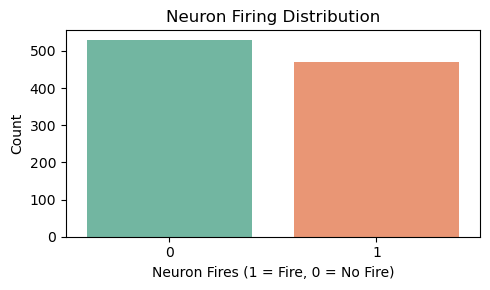

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='neuron_fire', palette='Set2')
plt.title("Neuron Firing Distribution")
plt.xlabel("Neuron Fires (1 = Fire, 0 = No Fire)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [8]:
X = df[['motion_sensor', 'temp_sensor']]
y = df['neuron_fire']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,motion_sensor,temp_sensor
29,1,0
535,1,1
695,1,1
557,1,1
836,1,1
...,...,...
106,1,1
270,1,1
860,1,1
435,1,1


In [11]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\mmoha\.anaconda\New folder\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print("\nTraining...")
history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1, validation_data=(X_test, y_test))


Training...
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7419 - loss: 0.5634 - val_accuracy: 0.7650 - val_loss: 0.3835
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8422 - loss: 0.3435 - val_accuracy: 1.0000 - val_loss: 0.2115
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.1800 - val_accuracy: 1.0000 - val_loss: 0.1098
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0663
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0610 - val_accuracy: 1.0000 - val_loss: 0.0465
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0247 - va

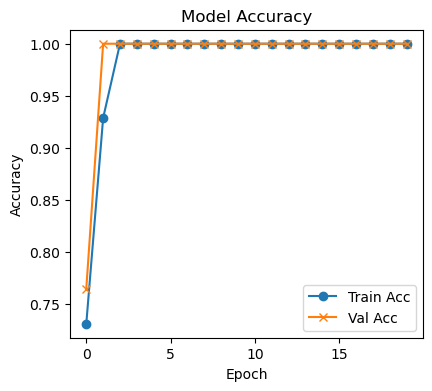

In [13]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

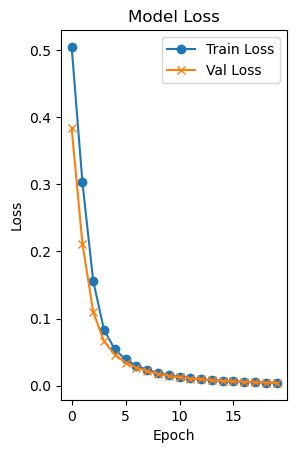

In [14]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [15]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


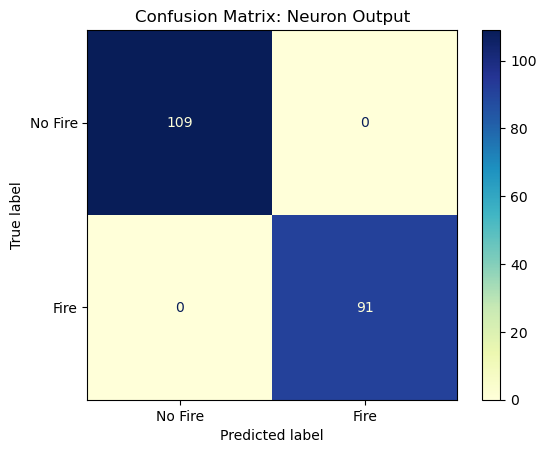

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix: Neuron Output")
plt.show()

In [18]:
model.save("fatigue_neuron_model.h5")
print("✅ Model saved as fatigue_neuron_model.h5")

✅ Model saved as fatigue_neuron_model.h5
